# 1. Definicija slike

Slika je u računalu je dvodimenionalni prikaz dobiven projekcijom boja trodimenzionalnog svijeta. Mračna komora osnova je za sve današnje kamere (foto aparate, kino, video, ili digaitalne kamere) štoviše, ona postoji u svim suvremenim kamerama, a predstavlja prostor između objektiva (otvora sa sustavom leća, kojim je zamijenjena rupica) i fotoosjetljive plohe na koju se snima. Plohe tog prostora suvremenih kamera ne smiju održavati svjetlosne zrake.

Rasterska grafika ili bitmap je podatak koji predstavlja pravokutnu mrežu piksela ili obojenih točaka, na nekom grafičkom izlaznom uređaju kao što je monitor ili na papiru. Svaka boja pojedinog piksela je posebno definirana tako da (kao primjer) RGB slike sadrže tri bajta po svakom pikselu, svaki bajt sadrži jednu posebno definiranu boju.

Kvalitet jedne rasterske slike određuje ukupan broj piksela (rezolucija slike) kao i broj vrijednosti za svaki pojedinačni piksel (dubina boje). Ako je dubina boje veća, više se nijansi može prikazati, to znači bolju sliku kao i vjerodostojniji prikaz.

![Prikaz slike](https://upload.wikimedia.org/wikipedia/commons/3/3b/Rgb-raster-image.svg) *Slika 01. Prikaz vektorske slike kao niz RGB vrijednosti piksela*

# 1.1. Instalacija okruženja

Kako bi radili sa slikama prvo je potrebno instalirati okruženje. Prvo je potrebno skinuti [Anaconda](https://www.anaconda.com/download/) programsko okruženje. Nakon instalacije sve što nam je potrebno je instalirano. Također je potrebno instalirati i OpenCV za Anaconda okruženje. 

Da bismo instalirali OpenCV sve što je potrebno je pokrenuti naredbu u Anaconda naredbenom retku:

```conda install -c https://conda.binstar.org/conda-forge opencv```

Instalaciju možemo provjeriti na sljedeći način, potrebno je otvoriti python konzolu te izvršiti sljedeći programski kod:
```python
import cv2
from sklearn import svm
```

Ukoliko ne bude poruka tipa *module cv2 not found* ili *module sklearn not found* potreno je reinstalirati programske pakete, ukoliko ne dobijete ništa instalirali smo radno okruženje.

## 1.2. Rad s matricama u Pythonu

Prvo se potrebno prisjetiti što je matrica u programskom jeziku. Matrica je lista od lista u pythonu je definiramo na sljedeći način.
```python
matrica=[[]]
```
S ovim programskim kodom napravili smo matricu 1x1 koja nema elemenata.
```python
print(matrica[0])
```
Ispisuje se prazna lista elemenata, da bi smo napravili matricu 2x2 s elementima od 1 do 4 pišemo sljedeći programski kod:
```python
matrica = [[1,2], [3,4]]
```
**Napomena:** Inicijalizacija matrice bi trebao biti poznat pojam, u nastavku ćemo se upoznati s numpy prograamskim paketom.

NumPy je jedan od glavnih znanstvenih paketa implementiranih za programski jezik Python, koji pruža podršku za upravljanje opširnim, više dimenzionalnim nizovima i matricama, te implementira široki spektar matematičkih funkcija za efikasno
upravljanje nad tim poljima.

```python
import numpy as np

matrica = np.array (matrica, dtype=np.int8)
```
S ovim programskim odsječkom napravljenu matricu pretvaramo u numpy strukturu tipa ndarray s kojom možemo koristiti sve funkcije koje numpy podržava. Recimo ukoliko želimo naći maksimum:

```python
np.max(matrica)
```
Ovom metodom vraća se globalni maksimum svih elemenata u matrici. Ukoliko želimo naći maksimum po retcima ili stupcima potrebno je koristiti argument axis, koji može primiti 2 vrijednosti 0 i 1 (vodoravno i okomito). Protumačite i proučite programski kod u nastavku, pokušajte naći sumu i prosjek po retcima i stupcima definirane matrice `matrica`.

In [2]:
import numpy as np

matrica = [[1,2], [3,4]]
matrica = np.array (matrica, dtype=np.uint8)
print (np.max(matrica))
print (np.max(matrica, axis=0))
print (np.max(matrica, axis=1))

4
[3 4]
[2 4]


## 1.3. Čitanje slika uz pomoć OpenCV programskog okruženja

Da bismo uopće koristili OpenCV modul potrebno ga je uvesti kao programsi modul. Nakon što se modul uveze preuzmite [sliku](https://static.independent.co.uk/s3fs-public/thumbnails/image/2016/11/14/12/messi.jpg) te ju spasite u isti direktorij i kojem se nalazi Vaš iPython notebook, sliku nazovite `slika01.jpg`. sljedeći programski kod bi trebao prikazati učitanu sliku.

```python
#Potrebno za inline ispis slika notebook-u
%matplotlib inline
#Uvezi potrebne module
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Učitaj sliku
slika = cv2.imread ('slika01.jpg')
plt.imshow(slika)
```
Nakon toga možemo sliku učitati i prikazati kao što je prikazano u primjeru u nastavku:

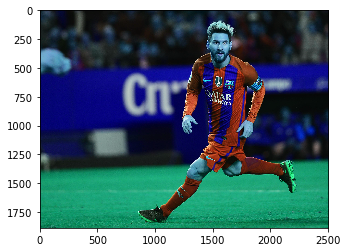

In [6]:
%matplotlib inline
#Uvezi potrebne module
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Učitaj sliku
slika = cv2.imread ('slika01.jpg')
plt.imshow(slika)

Slika je ispravno učitana no kao što je vidljivo kanali slike su pomešani, potrebno je pretvoriti u format koji imshow metoda očekuje a to je RGB slika je učitana u BGR formatu, očito je da su u slici plavi i crveni kanal zamjenjeni da bismo to promjenili potrebno je zamjeniti kanale.

```python
slika = cv2.cvtColor(slika, cv2.COLOR_BGR2RGB)
plt.imshow(slika)
```

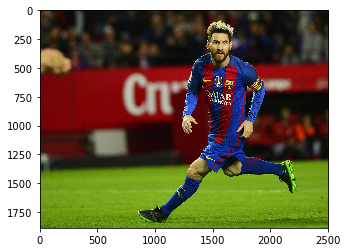

In [7]:
slika = cv2.cvtColor(slika, cv2.COLOR_BGR2RGB)
plt.imshow(slika)

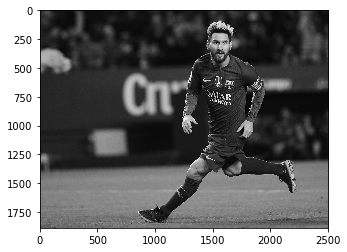

In [10]:
siva_slika = cv2.cvtColor(slika, cv2.COLOR_RGB2GRAY)
plt.imshow(siva_slika, cmap="gray")

## 1.4. Uzimanje djelova slike  (engl. Region of Interest - ROI)

Dijelovi slike se mogu uzimati iz matrice, ukoliko ispišete sliku kao uz pomoć print naredbe ispis će biti obična matrica 1887x2500x3 dimenzija. Gdje je 3 broj kanala (za siva_slika matrica će biti 1887x2500) uz shape svojstvo slike možemo provjeriti njene dimenzije. U biti sada slikama možemo napilulirati kao s matricama, možemo ih zbrajati, oduzimati pronalaziti matematička i statistička svojstva. 

In [11]:
print (slika.shape)
print (siva_slika.shape)

(1887, 2500, 3)
(1887, 2500)


U sljedećem programskom odsječku uzeti ćemo dijelove slike u pohraniti u posebnu varijablu, uzeti ćemo blok od 250-300 po x osi i 1500-1550 po y. Ovo ćemo jednostavno postići indeksiranjem. Ukoliko želimo dobiti vrijednost piksela na lokaciji 250,250:

In [18]:
piksel = slika[250,250]
piksel

array([40, 29, 11], dtype=uint8)

In [17]:
sivi_piksel = siva_slika[250,250]
sivi_piksel

30

Prva vrijednost predstavlja redak matrice,a druga vrijednost predstavlja stupac matrice. Ukoliko želomp uzeti blok 50x50 u rasponu od 250 piksela do 300 piksela, te blok 1500-1550 tada pišemo:

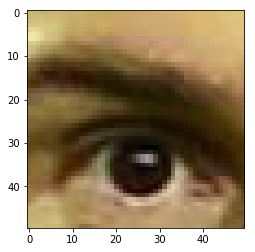

In [23]:
dio_slike = slika[250:300,1500:1550]
plt.imshow(dio_slike)